In [166]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import scipy as scipy
from math import *
from tqdm import tqdm
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec
import os
import sys

In [203]:
P = 3 # Number of self similar copies
# S = P**(2/(1+sqrt(5))) # Scaling factor
S = P**(11/(5*np.pi))
# S = sqrt(P)

### Generador de fractales a través de transformaciones afines

In [204]:
def transf_1(x_0,y_0):
    v_0 = np.array([[x_0],[y_0]])
    A_1 = np.array([[a[0],b[0]],
                    [c[0],d[0]]])
    b_1 = np.array([[e[0]],[f[0]]])
    return np.reshape(np.matmul(A_1,v_0)+b_1,(1,2))
def transf_2(x_0,y_0):
    v_0 = np.array([[x_0],[y_0]])
    A_2 = np.array([[a[1],b[1]],
                    [c[1],d[1]]])
    b_2 = np.array([[e[1]],[f[1]]])
    return np.reshape(np.matmul(A_2,v_0)+b_2,(1,2))
def transf_3(x_0,y_0):
    v_0 = np.array([[x_0],[y_0]])
    A_3 = np.array([[a[2],b[2]],
                    [c[2],d[2]]])
    b_3 = np.array([[e[2]],[f[2]]])
    return np.reshape(np.matmul(A_3,v_0)+b_3,(1,2))
def transf_4(x_0,y_0):
    v_0 = np.array([[x_0],[y_0]])
    A_4 = np.array([[a[3],b[3]],
                    [c[3],d[3]]])
    b_4 = np.array([[e[3]],[f[3]]])
    return np.reshape(np.matmul(A_4,v_0)+b_4,(1,2))
def transf_5(x_0,y_0):
    v_0 = np.array([[x_0],[y_0]])
    A_5 = np.array([[a[4],b[4]],
                    [c[4],d[4]]])
    b_5 = np.array([[e[4]],[f[4]]])
    return np.reshape(np.matmul(A_5,v_0)+b_5,(1,2))

Parámetros de la transformación afín

In [205]:
giro_1 = 0
giro_2 = np.pi/4
giro_3 = -np.pi/4

a = [(1/S)*np.cos(giro_1),(1/S)*np.cos(giro_2),(1/S)*np.cos(giro_3)]
b = [(1/S)*np.sin(giro_1),(1/S)*np.sin(giro_2),(1/S)*np.sin(giro_3)]
c = [-(1/S)*np.sin(giro_1),-(1/S)*np.sin(giro_2),-(1/S)*np.sin(giro_3)]
d = [(1/S)*np.cos(giro_1),(1/S)*np.cos(giro_2),(1/S)*np.cos(giro_3)]
e = [0,1/S,1/S]
f = [0,0,0]

p = [1/3,1/3,1/3]
  
transf = [transf_1,transf_2,transf_3]

Función que genera el fractal

In [206]:
def generate_fractal(n=1000000,x_0=0.,y_0=0.):
    fractal = np.zeros([n,2])
    fractal[0] = [x_0, y_0]
    
    for i in tqdm(range(n-1)):
        random_transformation = np.random.choice(transf, p=p)
        current_point = random_transformation(fractal[i,0],fractal[i,1])
        fractal[i+1] = current_point
    return fractal

Cálculo de la dimensión fractal

In [207]:
D = np.log(P)/np.log(S)

Resultado

In [208]:
fractal = generate_fractal(50000000) # Generamos el fractal mediante las transformaciones afines correspondientes

  0%|          | 0/49999999 [00:00<?, ?it/s]

100%|██████████| 49999999/49999999 [25:59<00:00, 32055.31it/s]


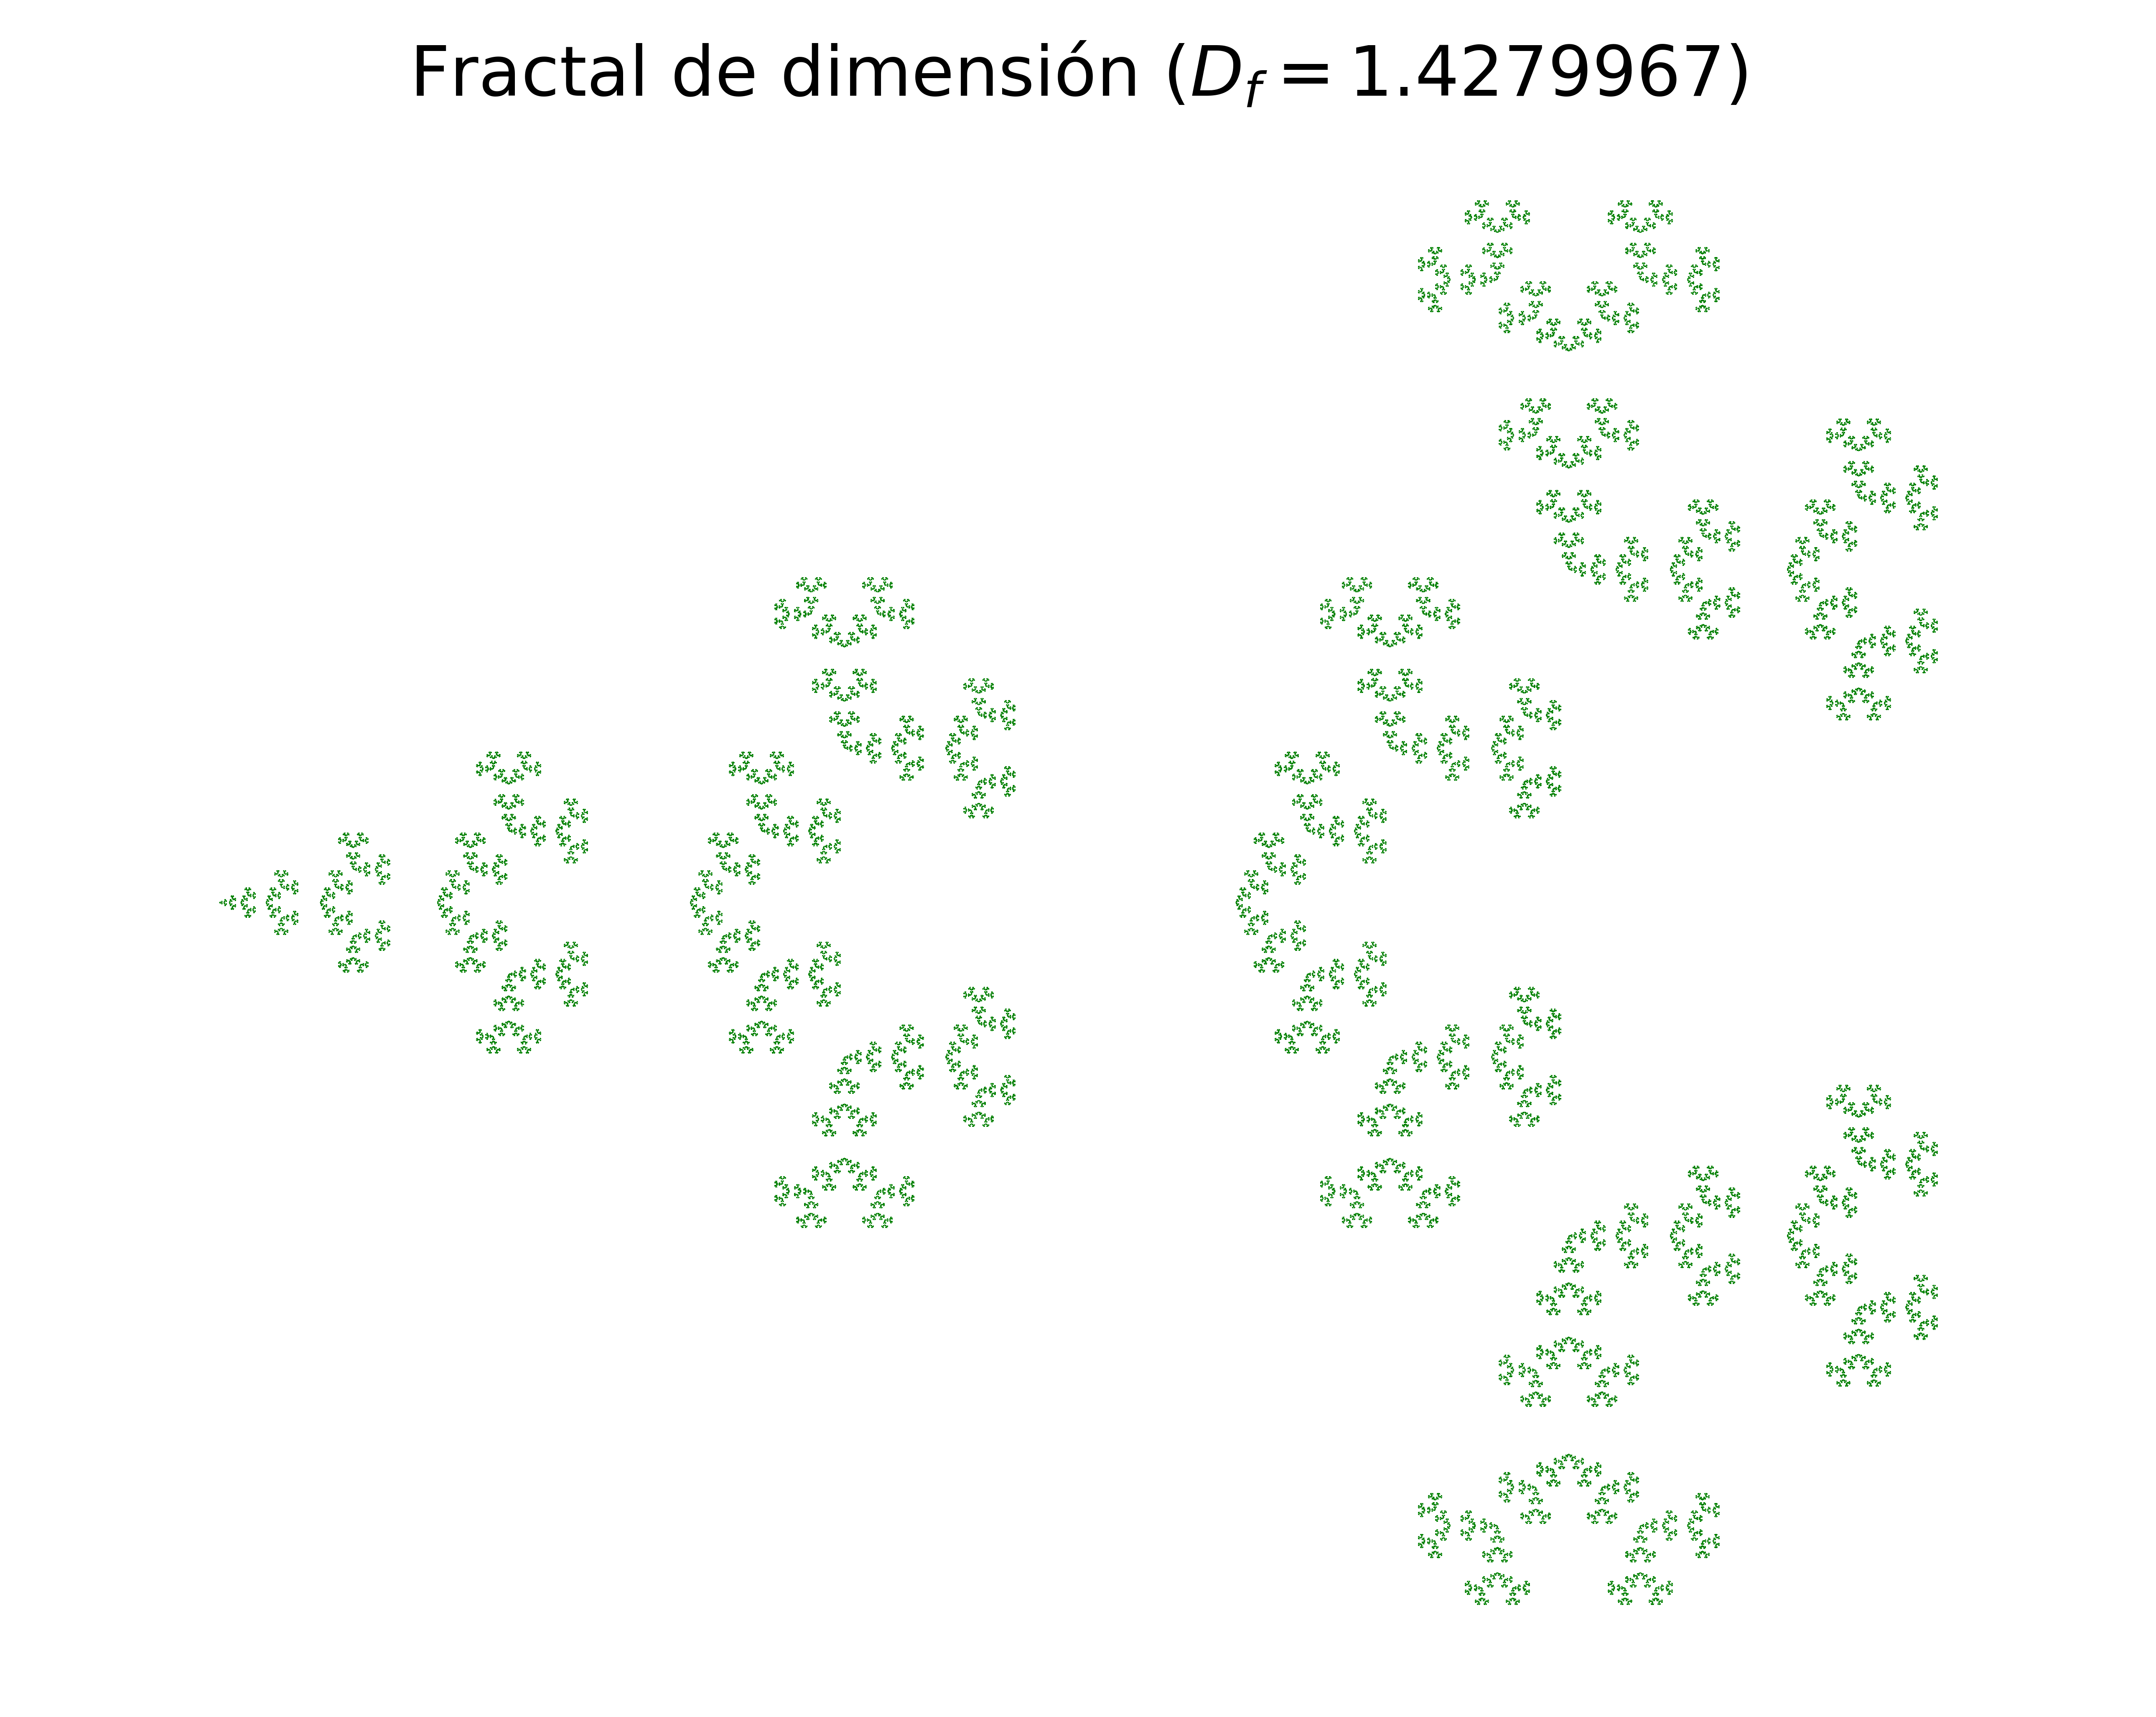

In [209]:
mpl.rcParams['figure.dpi'] = 1000
plt.plot(fractal[:,0], fractal[:,1],',',color='green')
plt.title('Fractal de dimensión $(D_f=$'+str(format(D,'.7f'))+'$)$')
plt.axis('off')
plt.axis('equal')
plt.plot()
plt.savefig('fractal_5pi_11',dpi=1000)